###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license © 2016 L.A. Barba, N.C. Clementi, G.F. Forsyth.  Based on [JITcode-MechE](https://github.com/barbagroup/JITcode-MechE), also under CC-BY and MIT licenses, 2014.

# Jupyter Notebooks

## Intro to the python scientific stack 

Welcome to Jupyter notebooks, a place where you can combine markdown text, LaTeX equations, code and results in a single document. 

In this notebook we will introduce useful python libraries that are important if you want to do scientific computing. We will learn:

* How to import data, manipulate arrays and do operations with them using [Numpy](http://www.numpy.org/).

* How to do nice plots using [matplotlib](http://matplotlib.org/).

## Context — Earth temperature over time

Is global temperature rising? How much? This is a question of burning importance in today's world!

Data about global temperatures are available from several sources: NASA, the National Climatic Data Center (NCDC) and the University of East Anglia in the UK. Check out the [University Corporation for Atmospheric Research](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years) (UCAR) for an in-depth discussion.

The [NASA Goddard Space Flight Center](http://svs.gsfc.nasa.gov/goto?3901) is one of our sources of global climate data. They produced this video showing a color map of the changing global surface **temperature anomalies** from 1880 to 2011.

The term [global temperature anomaly](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) means the difference in temperature with respect to a reference value or a long-term average. It is a very useful way of looking at the problem and in many ways better than absolute temperature. For example, a winter month may be colder than average in Washington DC, and also in Miami, but the absolute temperatures will be different in both places.

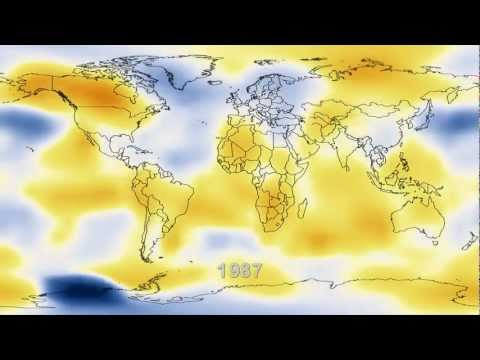

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('lyb4gau3LyI')

How would we go about understanding the _trends_ from the data on global temperature?

The first step in analyzing unknown data is to generate some simple plots using **matplotlib**. We are going to look at the temperature-anomaly history, contained in a file, and make our first plot to explore this data. 

We are going to smooth the data and then we'll fit a line to it to find a trend, plotting along the way to see how it all looks.

Let's get started!

### Step 1: Read a data file

We took the data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National Oceanic and Atmospheric Administration) webpage. Feel free to play around with the webpage and analize data by your own. Meantime we select some data and which is contained in the folder `resources`.

First we will use the file:

`land_global_temperature_anomaly-1880-2015.csv`

that contains the year and month on the first column and 12 monthly averages of land temperature anomaly listed sequentially on the second column, from 1880 to 2015. We will read the file, then make an initial plot to see what it looks like.

The first thing to do is to load our favorite library: the **NumPy** library for array operations.


In [2]:
import numpy

Pretty easy, right? Now to load the file, we use a function from the NumPy library called `loadtxt()`. To tell Python where to look for this function, we precede the function name with the library name, and use a dot between the two names. You can read the documentation in this [link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), although this is how it works:

In [3]:
numpy.loadtxt(fname='resources/land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

array([[  1.88001000e+05,  -1.69900000e-01],
       [  1.88002000e+05,  -5.74600000e-01],
       [  1.88003000e+05,  -7.48500000e-01],
       ..., 
       [  2.01510000e+05,   1.33980000e+00],
       [  2.01511000e+05,   1.30300000e+00],
       [  2.01512000e+05,   1.86890000e+00]])

Note that we called the function with three parameters: the file name and path, the delimiter that separates each value on a line (a comma in this case), and `skiprows=4` what tells Numpy to ommit the first 4 rows that in our file are a description of the file. Note that the first two parameters are strings (made up of characters) and we put them in quotes.

As the output of the function, we get an array. Because it's rather big, Python shows only a few rows and columns of the array. 

So far, so good. Now, what if we want to manipulate this data? Or plot it? We need to refer to it with a name. We've only just read the file, but we did not assign the array any name! Let's try again.

In [4]:
T_land = numpy.loadtxt(fname='resources/land_global_temperature_anomaly-1880-2015.csv', delimiter=',', skiprows=4)

That's interesting. Now, we don't see any output from the function call. Why? It's simply that the output was stored into the variable `T`, so to see it, we can do:

In [5]:
print(T_land)

[[  1.88001000e+05  -1.69900000e-01]
 [  1.88002000e+05  -5.74600000e-01]
 [  1.88003000e+05  -7.48500000e-01]
 ..., 
 [  2.01510000e+05   1.33980000e+00]
 [  2.01511000e+05   1.30300000e+00]
 [  2.01512000e+05   1.86890000e+00]]


Ah, there it is! Let's find out how big the array is. For that, we use a cool NumPy function called shape():

In [6]:
numpy.shape(T_land)

(1632, 2)

Again, we've told Python where to find the function shape() by attaching it to the library name with a dot. However, NumPy arrays also happen to have a property shape that will return the same value, so we can get the same result another way:

In [7]:
T_land.shape

(1632, 2)

It's just shorter. The array T holding our temperature-anomaly data has two columns and 1632 rows. Since we said we had monthly data, how many years is that?

In [8]:
1632/12

136.0

That's right: from 1880 through 2015.

In [9]:
#Ignore this cell, It simply loads a style for the notebook.

from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()